# Data Cleaning

1. Handling Missing Data
2. Handling Duplicated Entires
3. Handling outliers / unnatural values
4. Handling unwanted cols/attributes

In [1]:
import pandas as pd

df = pd.read_csv("JPMCDS24/datasets-1/datawh_missing.csv")
df.shape

(23, 7)

In [ ]:
df.head()

## Handling duplicated entries

- Step 1: Identify criterion to qualify any entry as duplicate
- Step 2: Treat duplicates
- 
      - whether duplicity is natural or system/human error error driven ?
      - If System/human error: drop the duplicates
      - else retain it if relevant to the use case.

In [ ]:
# checking how many rows are duplicates / repeating
df.duplicated(subset=['Dates']).sum()

In [ ]:
# checking how many rows are duplicates / repeating
df.duplicated().sum()

In [ ]:
# checking which rows are duplicating
df[df.duplicated(subset=['Dates'])]

In [ ]:
# checking which rows are duplicating
df[df.duplicated(subset=['Dates'],keep=False)]

In [9]:
# drop duplicates
print(df.shape)
df.drop_duplicates(subset=['Dates'],keep='last',inplace=True)
print(df.shape)

(23, 7)
(21, 7)


# Handling missing values

- Data is missing becuase it does not exist
- - for numeric attributes: replace missing values with arbitary value (min, max)
  -                         convert the column into categoric
  - for categoric: replace missing values with a "other"/"null" category
  -                 if unique values/high cardinality --> convert to binary

  
- Data is missing because of some human/system error
- - if % of missing data in a row is more than 60% ---> drop the row
  - if % of missing data in a column is more than 90% ---> drop the column | convert to binary
  - if % of missing data in a column is less than 10% ------> statistical imputation
  - - if column is numeric:
    - - skewed: median
      - not skewed: mean
  - - if column in categoric:
    - - nominal: mode
      - ordinal: median
  - if % of missing data in a column is b/w 10 to 30% -------> ML based imputation (ML dirven enrichment/treatment)
  - if % of missing data in a column is more than 30% -------> conver the column to categorical  

In [10]:
df

,Dates,Temperature,Humidity,Pressure,Air Quality,Day id,Vibration
0,30-04-2018,218,182,4,2,1,45
1,01-05-2018,?,182,3,2,2,56
2,02-05-2018,.,439,NaN,0,3,45
3,03-05-2018,2439,53,5,1,4,23
4,04-05-2018,824,444,5,NaN,5,35
5,05-05-2018,1744,.,5,1,6,26
6,06-05-2018,786,.,5,1,7,25
7,07-05-2018,1326,309,.,1,8,26
8,08-05-2018,1804,188,.,2,9,25
9,09-05-2018,?,420,0,1,10,35


In [ ]:
#check for missing values
df.isnull().sum()

In [ ]:
df = pd.read_csv("JPMCDS24/datasets-1/datawh_missing.csv",na_values=['?','.','NA','#'])
df.shape

In [ ]:
#check for missing values
df.isnull().sum()

In [ ]:
df.head()

In [ ]:
df.skew(numeric_only=True)

In [38]:
# if skewness -0.3 to +0.3 == almost zero skewness and normal distribution - use mean
# if skewness is above +0.3, below -0.3 == slightly skewed consider using median
# if skewness is above +1 or below -1 == heavilys skewed, perform outlier treatment before missing value treatment

In [39]:
# treat duplicates
df.drop_duplicates(keep='last',inplace=True)

In [ ]:
df.skew(numeric_only=True)

In [ ]:
# % of missing data
df.isnull().sum()/df.shape[0]

In [ ]:
import matplotlib.pyplot as plt
plt.hist(df.Temperature)
plt.show()

In [ ]:
df['Temperature'].fillna(df['Temperature'].mean(),inplace=True)
df.Temperature.skew()

In [ ]:
import matplotlib.pyplot as plt
plt.hist(df.Temperature)
plt.show()

In [ ]:
df['Humidity'].fillna(df['Humidity'].median(),inplace=True)
df['Pressure'].fillna(df['Pressure'].median(),inplace=True)
df['Air Quality'].fillna(df['Air Quality'].median(),inplace=True)

df.isnull().sum()

# Handling outliers

- Treating outliers: Numeric Attributes
- - if skewness > +1 ==> higher value outliers are present
  - Clipping: clip the values above 90-95 percentile by nearest inlier
  - Convert to categoric/binary
  
  - if skewness < -1 ==> lower value outliers are present
  - Clipping: clip the values eblow 5-10 percentile by nearest inlier
  - convert to categoric/binary

In [52]:
# Identifying outliers
# Box Plot Approach
# value > Q3 + 1.5*IQR or value < Q1 - 1.5*IQR is considered as outlier
# IQR = Inter quartile range, IQR = Q3 - Q1
# Q1 = 25th percentile value, Q3 = 75th percentile value

# Skewness Approach
# if skewness is > +1 or below -1 ===> outliers are present

In [ ]:
df.skew(numeric_only=True)

In [ ]:
plt.boxplot(df.Vibration)
import seaborn as sns
sns.set_theme()
plt.show()

In [ ]:
thresh = df.Vibration.quantile(0.95) # acces the vlaue at 95 percentile
# replace all values higher than thesh by maximum value below thresh
df.Vibration[df.Vibration>thresh] = df.Vibration[df.Vibration<thresh].max()
df.Vibration.skew()

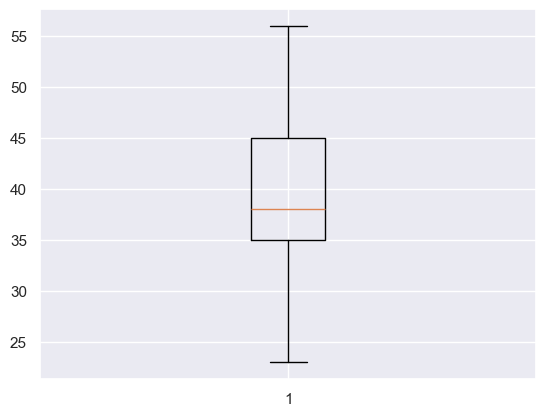

In [60]:
plt.boxplot(df.Vibration)
plt.show()